In [23]:
library(tidyverse)
library(car)
library(olsrr)
library(stringr)
library(tidytext)
library(syuzhet)

In [24]:
# Make sure to change this
setwd("/home/yeachan153/Desktop/BDS/R/Big Data Analytics/Big-Data-Analytics/Text Analytics Project")

" 
Read in the CSV file
"
personality = as.tibble(read.csv("youtube-personality/YouTube-Personality-Personality_impression_scores_train.csv", 
                                 encoding = "UTF-8",
                                 sep = " "))

gender = as.tibble(read.csv("youtube-personality/YouTube-Personality-gender.csv",
                            encoding = "UTF-8",
                            sep = " "))

audiovisual = as.tibble(read.csv("youtube-personality/YouTube-Personality-audiovisual_features.csv",
                                 encoding = "UTF-8",
                                 sep = " "))

transcripts = as.tibble(read.csv("youtube-personality/transcripts.csv",
                                 encoding = "UTF-8",
                                 sep = ","))

transcripts$index = as.character(transcripts$index)

transcripts =
  transcripts %>%
  rename(vlogId = index,
         transcript = X0) %>%
  mutate(vlogId = substr(vlogId, 1, nchar(vlogId)-4))

personality$vlogId = as.character(personality$vlogId)
gender$vlogId = as.character(gender$vlogId)
audiovisual$vlogId = as.character(audiovisual$vlogId)

training_data = 
  personality %>%
  left_join(gender, on = c("vlogID" = "vlogID")) %>%
  left_join(audiovisual, on = c("vlogID" = "vlogID")) %>%
  left_join(transcripts, on = c("clogID" = "vlogID"))

#tokenization
training_data$transcript <- as.vector(training_data$transcript)
tidy_data <- training_data %>% 
  unnest_tokens(word, transcript, to_lower = TRUE) %>% 
  anti_join(get_stopwords())

#count the total number of words for each person
total_words <- tidy_data %>% 
  group_by(vlogId) %>% 
  count() %>% 
  rename(total_words = n)

#count the percentage of words related to big 5
words_E = c("bar","drinks", "restaurant", "dancing", "restaurants", "grandfather", "miami", "countless", "drinking", "shots", "girls", "glorious", "pool", "crowd", "sang", "grilled")
words_A = c("wonderful", "together", "visiting", "morning", "spring", "walked", "beautiful", "staying", "felt", "share", "gray", "joy", "afternoon", "day", "moments", "hug", "glad")
words_C = c("completed", "adventure", "adventures", "enjoying", "hawaii", "it's", "deck")
words_N = c("awful", "though", "lazy", "worse", "depressing", "irony", "terrible", "stressful", "horrible", "sort", "annoying", "ashamed", "ban")
words_O = c("folk", "humans", "of", "poet", "art", "by", "universe", "poetry", "narrative", "culture", "century", "sexual", "films", "novel", "decades", "ink", "passage", "literature", "blues")
words_nE = c("other", "cats", "computer", "minor")
words_nA = c("porn", "cost", "fuck")
words_nC = c("stupid", "boring", "desperate", "saying", "utter", "it's", "extreme")
words_nN = c("road", "southern", "visited", "ground", "oldest", "invited", "completed")
words_nO = c("giveaway")

check_words <- function(wordlist){
  tidy_data %>% 
    filter(word %in% wordlist) %>% 
    group_by(vlogId) %>% 
    count() %>% 
    left_join(total_words) %>% 
    mutate(n/total_words) %>% 
    select(-n, -total_words)
}

E_words <- check_words(words_E) %>% 
  rename(words_Extraversion = 'n/total_words')

A_words <- check_words(words_A) %>% 
  rename(words_Agreeableness = 'n/total_words')

C_words <- check_words(words_C) %>% 
  rename(words_Conscientiousness = 'n/total_words')

N_words <- check_words(words_N) %>% 
  rename(words_Neuroticism = 'n/total_words')

O_words <- check_words(words_O) %>% 
  rename(words_Openness = 'n/total_words')

nE_words <- check_words(words_nE) %>% 
  rename(words_nExtraversion = 'n/total_words')

nA_words <- check_words(words_nA) %>% 
  rename(words_nAgreeableness = 'n/total_words')

nC_words <- check_words(words_nC) %>% 
  rename(words_nConscientiousness = 'n/total_words')

nN_words <- check_words(words_nN) %>% 
  rename(words_nNeuroticism = 'n/total_words')

nO_words <- check_words(words_nO) %>% 
  rename(words_nOpenness = 'n/total_words')

#putting them bag to the training data
training_data <- training_data %>% 
  left_join(E_words) %>%
  left_join(A_words) %>%
  left_join(C_words) %>%
  left_join(N_words) %>%
  left_join(O_words) %>%
  left_join(nE_words) %>%
  left_join(nA_words) %>%
  left_join(nC_words) %>%
  left_join(nN_words) %>%
  left_join(nO_words) %>% 
  replace(., is.na(.), 0)

#sentiment analysis with nrc
nrc <- tidy_data %>% 
  inner_join(get_sentiments('nrc')) %>%
  count(`vlogId`, sentiment) %>%
  spread(sentiment, n, fill = 0)

training_data <- training_data %>% 
  left_join(nrc) %>%
  left_join(total_words) %>%
  mutate(anger = anger / total_words,
         anticipation = anticipation / total_words,
         disgust = disgust / total_words,
         fear = fear / total_words,
         joy = joy / total_words,
         negative = negative / total_words,
         positive = positive / total_words,
         sadness = sadness / total_words,
         surprise = surprise / total_words,
         trust = trust / total_words) %>%
  select(-total_words)

# sentiment scores from syuzhet package - positive = positive emotions, 
# negative = negative emotions
training_data$sentiment <- get_sentiment(
    as.vector(training_data$transcript), method = "afinn")

training_data = 
    training_data %>%
    select(-transcript)

[1] " \nRead in the CSV file\n"

Joining, by = "vlogId"
Joining, by = "vlogId"
Joining, by = "vlogId"
Joining, by = "word"
Joining, by = "vlogId"
Joining, by = "vlogId"
Joining, by = "vlogId"
Joining, by = "vlogId"
Joining, by = "vlogId"
Joining, by = "vlogId"
Joining, by = "vlogId"
Joining, by = "vlogId"
Joining, by = "vlogId"
Joining, by = "vlogId"
Joining, by = "vlogId"
Joining, by = "vlogId"
Joining, by = "vlogId"
Joining, by = "vlogId"
Joining, by = "vlogId"
Joining, by = "vlogId"
Joining, by = "vlogId"
Joining, by = "vlogId"
Joining, by = "vlogId"
Joining, by = "vlogId"
Joining, by = "word"
Joining, by = "vlogId"
Joining, by = "vlogId"


## Baseline

In [25]:
#Agreeableness baseline
training_data = training_data[,c(3, 7,8:53)]
A_baseline = lm(Agr ~ ., data = training_data)
summary(A_baseline)


Call:
lm(formula = Agr ~ ., data = training_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9706 -0.4692  0.1101  0.4450  1.7345 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               5.407e+00  2.085e+00   2.594  0.01000 *  
genderMale               -3.951e-01  1.323e-01  -2.987  0.00307 ** 
mean.pitch               -4.656e-04  1.443e-03  -0.323  0.74716    
sd.pitch                 -2.593e-01  5.527e-01  -0.469  0.63930    
mean.conf.pitch           1.781e-01  3.979e-01   0.448  0.65483    
sd.conf.pitch            -3.376e-01  6.781e-01  -0.498  0.61895    
mean.spec.entropy         8.663e-02  3.814e-01   0.227  0.82046    
sd.spec.entropy          -6.376e-01  1.059e+00  -0.602  0.54751    
mean.val.apeak            3.953e-01  8.245e-01   0.479  0.63204    
sd.val.apeak              2.990e+00  1.650e+00   1.812  0.07110 .  
mean.loc.apeak            8.304e+00  1.446e+01   0.574  0.56620    
sd.loc.apeak            

Warning message:
“not plotting observations with leverage one:
  28”Warning message:
“not plotting observations with leverage one:
  28”

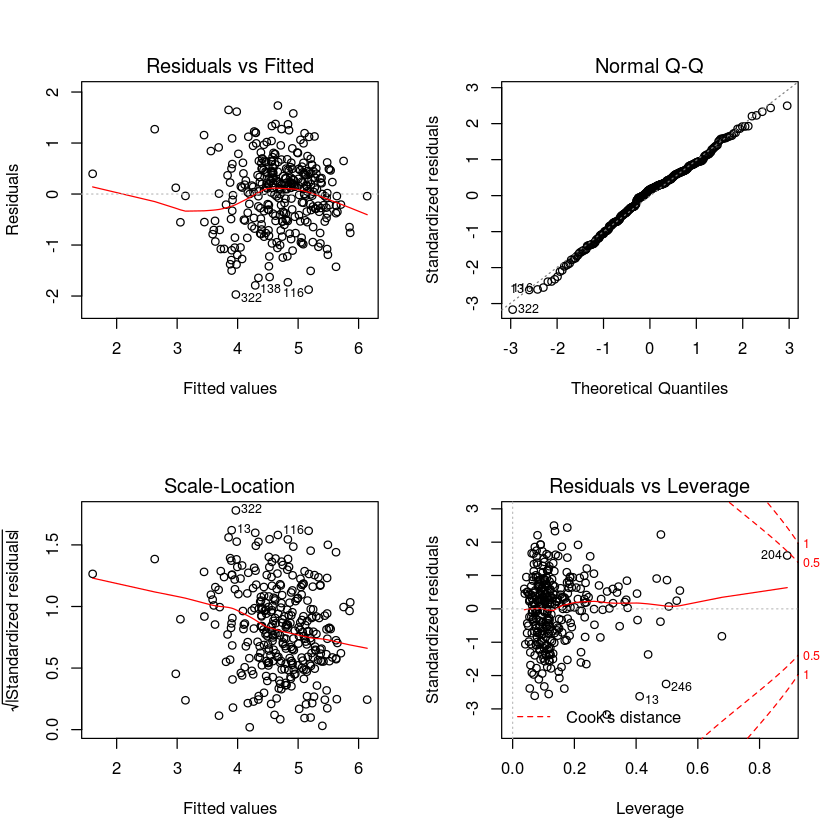

In [26]:
par(mfrow = c(2,2))
plot(A_baseline)

## Model 2 - multicollinearity

In [27]:
#remove multicollinearity
vif(A_baseline)[vif(A_baseline) > 10]
modelA2 = update(A_baseline, ~. 
                -mean.conf.pitch 
                -mean.spec.entropy
                -mean.num.apeak
                -avg.voice.seg
                -negative
                -postive)
summary(modelA2)

mean.conf.pitch mean.spec.entropy    mean.num.apeak    avg.voiced.seg 
         11.59118          10.30668          11.74448          11.60390


Call:
lm(formula = Agr ~ gender + mean.pitch + sd.pitch + sd.conf.pitch + 
    sd.spec.entropy + mean.val.apeak + sd.val.apeak + mean.loc.apeak + 
    sd.loc.apeak + sd.num.apeak + mean.energy + sd.energy + mean.d.energy + 
    sd.d.energy + avg.voiced.seg + avg.len.seg + time.speaking + 
    voice.rate + num.turns + hogv.entropy + hogv.median + hogv.cogR + 
    hogv.cogC + words_Extraversion + words_Agreeableness + words_Conscientiousness + 
    words_Neuroticism + words_Openness + words_nExtraversion + 
    words_nAgreeableness + words_nConscientiousness + words_nNeuroticism + 
    words_nOpenness + anger + anticipation + disgust + fear + 
    joy + positive + sadness + surprise + trust + sentiment, 
    data = training_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9575 -0.4262  0.1036  0.4462  1.8076 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                5.743583   1.255980   4.573 7.23e-06 ***
genderMale      

## Model 3 - Backward selection

In [28]:
#remove variables with p > 0.3
to_remove = ols_step_backward(modelA2)
paste(to_remove$removed, collapse = " - ")

We are eliminating variables based on p value...
No more variables satisfy the condition of prem: 0.3


[1] "joy - voice.rate - sadness - anticipation - mean.loc.apeak - sd.loc.apeak - mean.pitch - words_nOpenness - sd.d.energy - mean.energy - sd.conf.pitch - avg.len.seg - words_nNeuroticism - mean.d.energy - time.speaking - fear - words_nExtraversion - sd.spec.entropy - hogv.median - hogv.cogR - words_Extraversion - mean.val.apeak - avg.voiced.seg - hogv.entropy - words_Openness - num.turns - sd.pitch - words_Agreeableness"

In [31]:
modelA3 = update(modelA2, ~.
                 -joy - voice.rate - sadness - anticipation - mean.loc.apeak - sd.loc.apeak 
                 - mean.pitch - words_nOpenness - sd.d.energy - mean.energy - sd.conf.pitch 
                 - avg.len.seg - words_nNeuroticism - mean.d.energy - time.speaking - fear 
                 - words_nExtraversion - sd.spec.entropy - hogv.median - hogv.cogR 
                 - words_Extraversion - mean.val.apeak - avg.voiced.seg - hogv.entropy 
                 - words_Openness - num.turns - sd.pitch - words_Agreeableness)


Call:
lm(formula = Agr ~ gender + sd.val.apeak + sd.num.apeak + sd.energy + 
    hogv.cogC + words_Conscientiousness + words_Neuroticism + 
    words_nAgreeableness + words_nConscientiousness + anger + 
    disgust + positive + surprise + trust + sentiment, data = training_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.0267 -0.4629  0.1046  0.4591  1.7762 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                5.902532   0.408533  14.448  < 2e-16 ***
genderMale                -0.452773   0.084852  -5.336 1.84e-07 ***
sd.val.apeak               1.554831   0.940148   1.654 0.099184 .  
sd.num.apeak              -0.026346   0.024413  -1.079 0.281358    
sd.energy                 -0.086731   0.070471  -1.231 0.219362    
hogv.cogC                 -0.006892   0.002200  -3.133 0.001897 ** 
words_Conscientiousness   73.205279  46.147537   1.586 0.113690    
words_Neuroticism          9.299596   8.626302   1.078 0.281854   

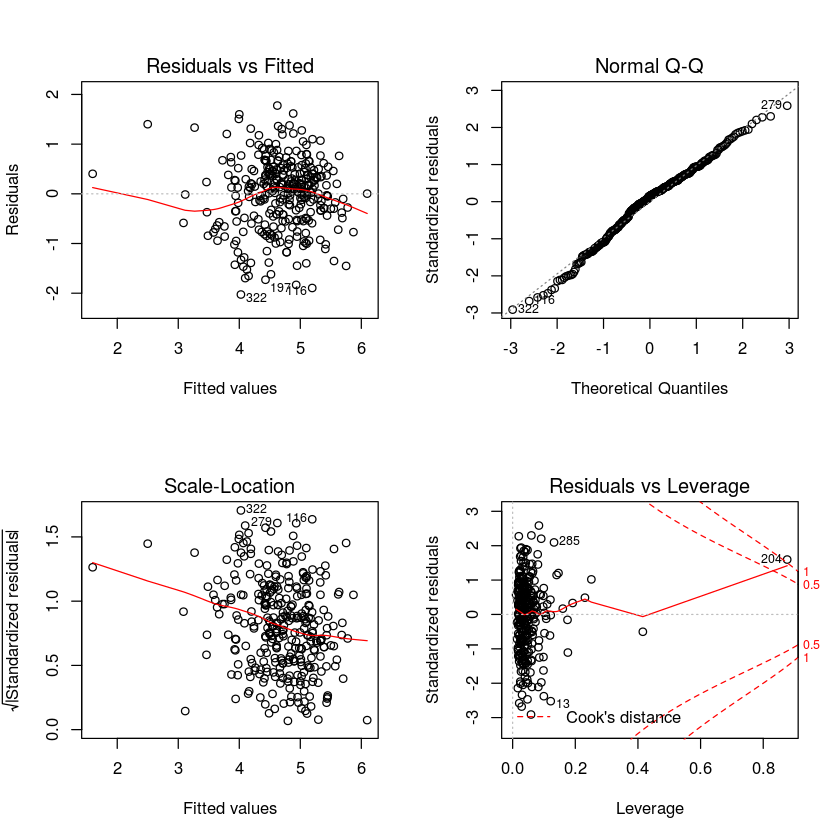

In [32]:
summary(modelA3)
par(mfrow = c(2,2))
plot(modelA3)

## Model 4 - remove outliers

No Studentized residuals with Bonferonni p < 0.05
Largest |rstudent|:
     rstudent unadjusted p-value Bonferonni p
322 -2.946625          0.0034587           NA


Call:
lm(formula = Agr ~ gender + sd.val.apeak + sd.num.apeak + sd.energy + 
    hogv.cogC + words_Conscientiousness + words_Neuroticism + 
    words_nAgreeableness + words_nConscientiousness + anger + 
    disgust + positive + surprise + trust + sentiment, data = training_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.89280 -0.45718  0.08684  0.44364  1.77292 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                5.975683   0.404294  14.781  < 2e-16 ***
genderMale                -0.437902   0.083965  -5.215 3.38e-07 ***
sd.val.apeak               1.157596   0.938371   1.234  0.21829    
sd.num.apeak              -0.032750   0.024212  -1.353  0.17717    
sd.energy                 -0.090768   0.069621  -1.304  0.19330    
hogv.cogC                 -0.006576   0.002176  -3.023  0.00272 ** 
words_Conscientiousness   70.993591  45.588723   1.557  0.12044    
words_Neuroticism          9.578324   8.521213   1.124  

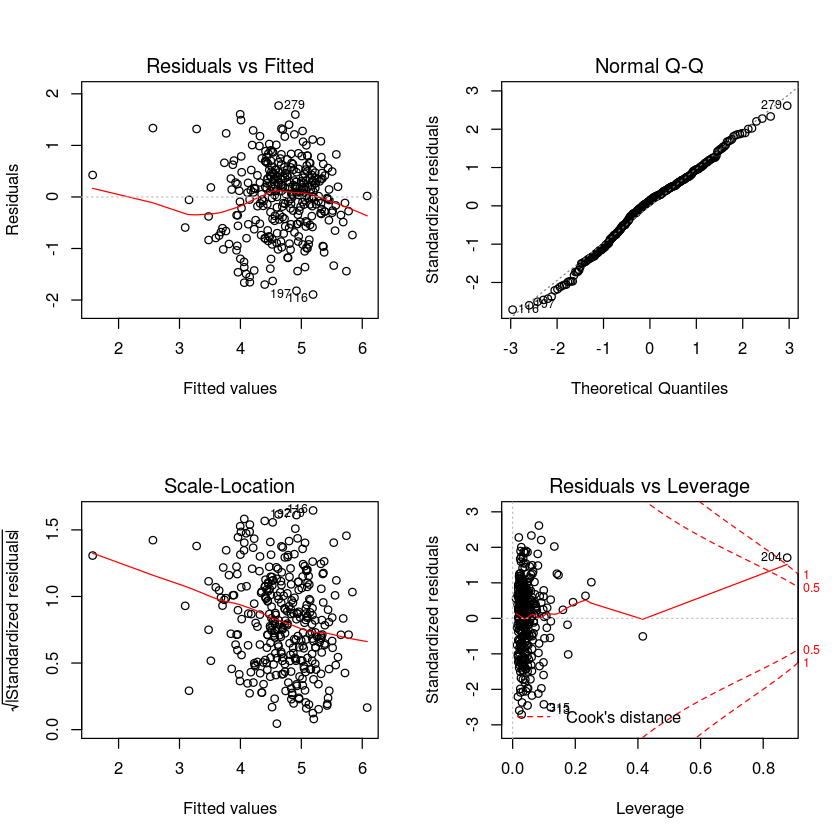

In [33]:
outlierTest(modelA3)
training_data = training_data[-322,]
modelA4 = update(modelA3)
summary(modelA4)
par(mfrow = c(2,2))
plot(modelA4)

## Model 5 - Non linear relationships

In [36]:
summary(modelA4)


Call:
lm(formula = Agr ~ gender + sd.val.apeak + sd.num.apeak + sd.energy + 
    hogv.cogC + words_Conscientiousness + words_Neuroticism + 
    words_nAgreeableness + words_nConscientiousness + anger + 
    disgust + positive + surprise + trust + sentiment, data = training_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.89280 -0.45718  0.08684  0.44364  1.77292 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                5.975683   0.404294  14.781  < 2e-16 ***
genderMale                -0.437902   0.083965  -5.215 3.38e-07 ***
sd.val.apeak               1.157596   0.938371   1.234  0.21829    
sd.num.apeak              -0.032750   0.024212  -1.353  0.17717    
sd.energy                 -0.090768   0.069621  -1.304  0.19330    
hogv.cogC                 -0.006576   0.002176  -3.023  0.00272 ** 
words_Conscientiousness   70.993591  45.588723   1.557  0.12044    
words_Neuroticism          9.578324   8.521213   1.124  

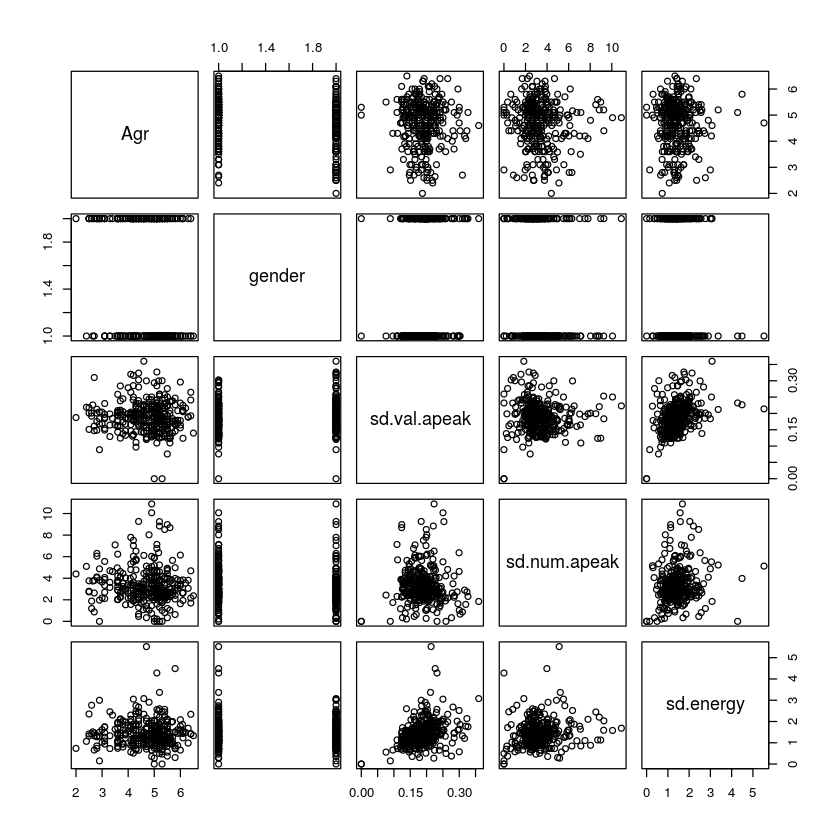

In [45]:
training_data = 
  training_data %>%
  select(Agr, gender, sd.val.apeak ,
        sd.num.apeak,sd.energy  ,
        hogv.cogC ,words_Conscientiousness ,
        words_Neuroticism,words_nAgreeableness,
        words_nConscientiousness,anger ,
        disgust, positive, surprise, trust,
        sentiment)

pairs(training_data[,c(1:5)])

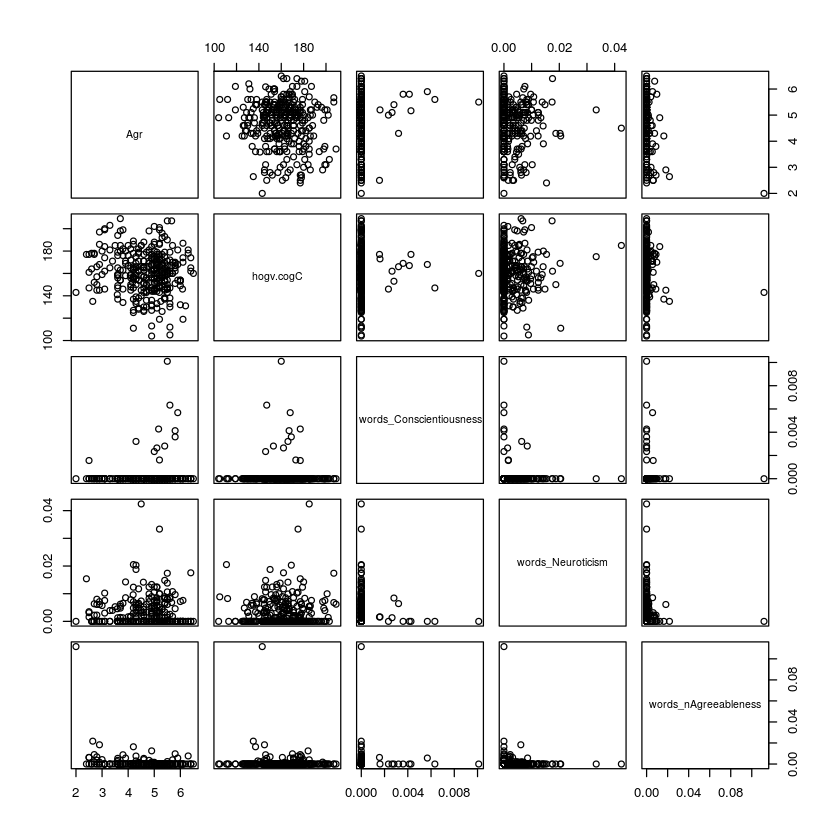

In [46]:
pairs(training_data[,c(1,6:9)])

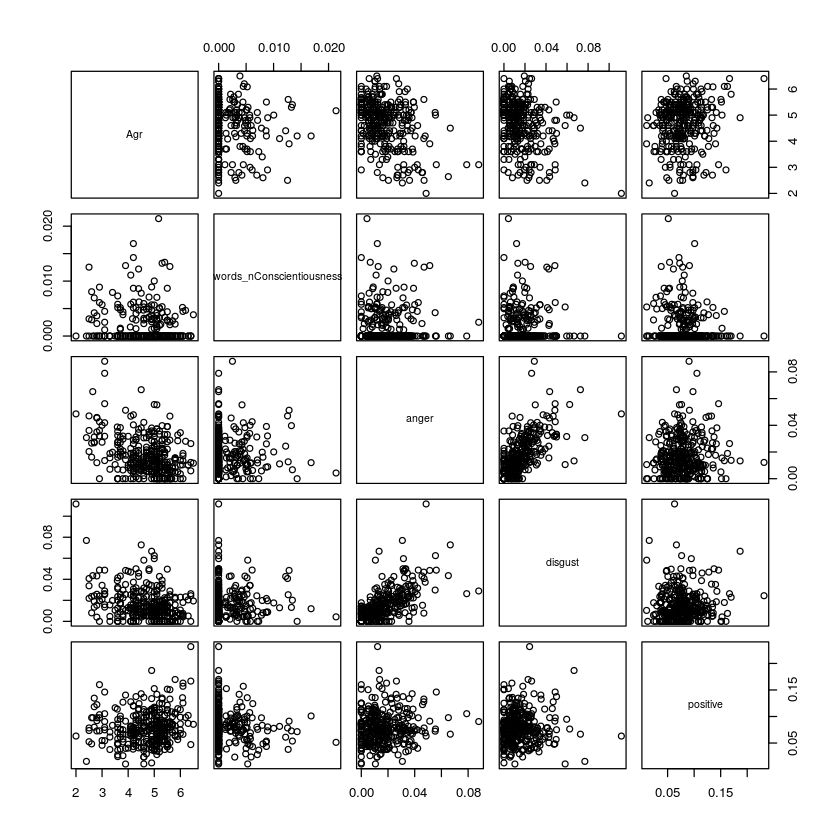

In [47]:
pairs(training_data[,c(1,10:13)])

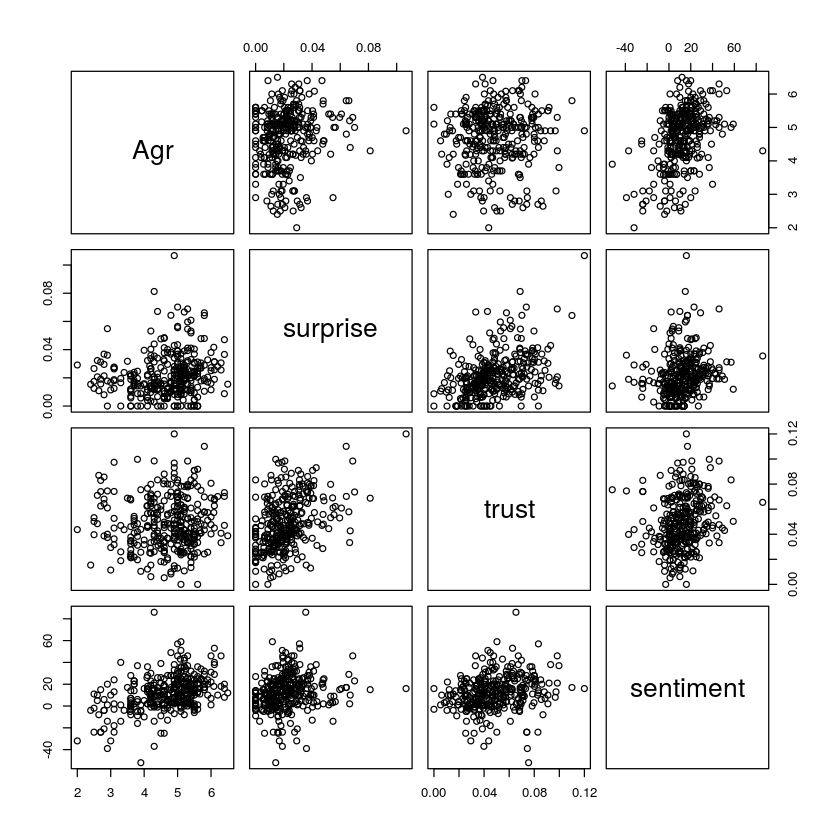

In [48]:
pairs(training_data[,c(1,14:16)])

No non-linear relationships found.

## Model 6 - Interactions

In [53]:
modelA6 = update(modelA4, ~. + gender:words_nConscientiousness
              + gender:positive)
summary(modelA6)


Call:
lm(formula = Agr ~ gender + sd.val.apeak + sd.num.apeak + sd.energy + 
    hogv.cogC + words_Conscientiousness + words_Neuroticism + 
    words_nAgreeableness + words_nConscientiousness + anger + 
    disgust + positive + surprise + trust + sentiment + gender:words_nConscientiousness + 
    gender:positive, data = training_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.91701 -0.41729  0.08238  0.42253  1.91808 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                           5.801663   0.408069  14.217  < 2e-16 ***
genderMale                            0.012996   0.228768   0.057 0.954736    
sd.val.apeak                          1.086414   0.930946   1.167 0.244122    
sd.num.apeak                         -0.030567   0.024074  -1.270 0.205158    
sd.energy                            -0.102722   0.069180  -1.485 0.138619    
hogv.cogC                            -0.006678   0.002159  -3.093 0.0